In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 1. Boston Housing Data

#### 1.1. load file boston.csv and ensure the file loaded good.

In [2]:
boston = pd.read_csv("boston.csv.bz2", sep="\t")
print(boston.shape)
print(boston.sample(3))

(506, 14)
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
466  3.77498   0.0  18.10     0  0.655  5.952  84.7  2.8715   24  666   
63   0.12650  25.0   5.13     0  0.453  6.762  43.4  7.9809    8  284   
447  9.92485   0.0  18.10     0  0.740  6.251  96.6  2.1980   24  666   

     ptratio   black  lstat  medv  
466     20.2   22.01  17.15  19.0  
63      19.7  395.58   9.50  25.0  
447     20.2  388.52  16.44  12.6  


There are 506 observationsa and 14 variables.

## 2. Simple Regression

#### 2.1.a. run the linear regression in the form medvi = β0 + β1 · rmi + εi and show the regression output.

In [3]:
m = smf.ols('medv ~ rm', data = boston).fit()
m.params

Intercept   -34.670621
rm            9.102109
dtype: float64

#### 2.1.b. interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant?

B0 is -34.67 and B1 is 9.1. B0 means the median price of the house in the neighborhood without any rooms while B1 means how much the median price in the neighborhood changes per 1 increase in the average number of rooms. These numbers are statistically significant as they help predict the median price based on the model. Median price without any rooms: -34.67, for every 1 increase in average number of rooms median price increases by 9.1.

#### 2.1.c. What do you think, why is the intercept negative? Does it tell us anything about house prices?

The intercept is negative because that is the median price of houses without any rooms, which makes sense because there shouldn't be any houses without room. This tells us that houses needs to have a some numbers of room to have value.

#### 2.1.d. Try to think about what do these numbers tell about the city and society. Remember: this is not about house price versus house size, this is neighborhood’s median house price versus neighborhood’s average house size. Try to think in terms of poor and rich neighborhoods!

Rich neighborhoods tend to have a higher median price because the average house size of richer neighborhoods also tends to be bigger. On the other hand, poorer neighborhoods tends to have smaller average house size, which in turns causes their median house price to be lower.

#### 2.1. (e) create a plot of medv (vertical) versus rm (horizontal) (f) add your regression line on the plot. (g) comment the plot: is the line upward or downward sloping? Do you see the dots trending up/down in a similar fashion?

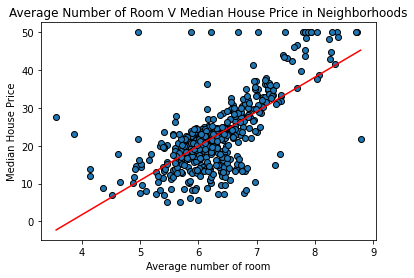

In [4]:
x = np.linspace(boston.rm.min(), boston.rm.max(), 10)
yhat = m.params[0] + m.params[1] * x
plt.scatter(boston.rm, boston.medv, edgecolor="k")
plt.plot(x, yhat, c='red')
plt.title("Average Number of Room V Median House Price in Neighborhoods")
plt.xlabel("Average number of room")
plt.ylabel("Median House Price")
plt.show()

The line is upward sloping and the dots trend upwards as well.

#### 2.2.a. run the linear regression in the form medvi = β0 + β1 · rmi + εi and show the regression output.

In [5]:
m = smf.ols('medv ~ age', data = boston).fit()
m.params

Intercept    30.978678
age          -0.123163
dtype: float64

#### 2.2.b. interpret the coefficients (β0 and β1). What do these numbers mean? Are these statistically significant?

B0 means the median price of the house in the a new neighborhood (0% of houses built before 1940) and B1 means how much the median price of the house in the neighborhood changes for every 1 change in proportion of owner-occupied units built prior to 1940. 30.98 is the median price of the neighborhood for prices that are new, and for every 1 increase in age, the median price drops by -0.123.

#### 2.2.c. What do you think, why is the intercept negative? Does it tell us anything about house prices?

For this case, the intercept is positive, which tells us that houses that have no age has value.

#### 2.2.d. Try to think about what do these numbers tell about the city and society. Remember: this is not about house price versus house size, this is neighborhood’s median house price versus neighborhood’s average house size. Try to think in terms of poor and rich neighborhoods!

For this case, this tells us that neighborhoods that have more newer houses has a higher median price while neighborhoods that have more older houses have a lower median price.

#### 2.2. (e) create a plot of medv (vertical) versus rm (horizontal) (f) add your regression line on the plot. (g) comment the plot: is the line upward or downward sloping? Do you see the dots trending up/down in a similar fashion?

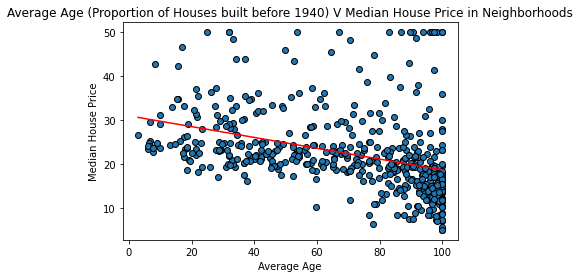

In [6]:
x = np.linspace(boston.age.min(), boston.age.max(), 10)
yhat = m.params[0] + m.params[1] * x
plt.scatter(boston.age, boston.medv, edgecolor="k")
plt.plot(x, yhat, c='red')
plt.title("Average Age (Proportion of Houses built before 1940) V Median House Price in Neighborhoods")
plt.xlabel("Average Age")
plt.ylabel("Median House Price")
plt.show()

The slope is downwards and so are the dots

## 3. Multiple Regression

#### 3.1. Now use multiple regression to estimate the relationship between median house price and the neigh-borhood characteristics. Include all variables (except medv) as the explanatory variables. Print the output.

In [7]:
m = smf.ols('medv ~ rm + age + crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', data = boston).fit()
m.params

Intercept    36.459488
rm            3.809865
age           0.000692
crim         -0.108011
zn            0.046420
indus         0.020559
chas          2.686734
nox         -17.766611
dis          -1.475567
rad           0.306049
tax          -0.012335
ptratio      -0.952747
black         0.009312
lstat        -0.524758
dtype: float64

#### 3.2. Interpret the results for rm and age, the same two variables your used above.

RM is now 3.809 and age is 0.000692. Which means now all variables considered, the median price of houses in a neighborhood only increases by 3.809 per 1 increase in average number of room, and 0.000692

#### 3.3. Explain why age is now essentially 0, while it was -0.12 and highly statistically significant in Q 2. 2. Does it tell you something about how house prices are determined?

There are more variables now that contribute to the median price of houses in neighborhood more than the proportion of houses build before 1940. This tells us that the proportion of houses built before 1940 doesn't really contribute the house prices when all factors are considered.